## Importing Dependencies

In [76]:
!pip install pyspark
import pandas as pd
import numpy as np
import json
import csv
import pandas as pd
from pyspark import SparkContext, SparkConf, StorageLevel, SQLContext
from pyspark.sql import SparkSession, Row
from pyspark.sql import functions as F
from pyspark.sql import types as T

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## Importing Reading and Cleaning files

In [77]:
business_url = '/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/yelp_academic_dataset_business.json'
checkin_url = '/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/yelp_academic_dataset_checkin.json'
reviews_url = '/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/yelp_academic_dataset_review.json'
tip_url = '/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/yelp_academic_dataset_tip.json'
user_url = '/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/yelp_academic_dataset_user.json'

### Setting up SparkSession and SparkDF

In [106]:
spark = SparkSession.builder.appName("DBFA Yelp Project").config("spark.logConf", True).getOrCreate()
sContext = spark.sparkContext
sqlContext = SQLContext(sContext)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [79]:
sContext

<SparkContext master=local[*] appName=DBFA Yelp Project>

### Reading data

In [80]:
business_df = sqlContext.read.json(business_url)
reviews_df = sqlContext.read.json(reviews_url)
user_df = sqlContext.read.json(user_url)
tips_df = sqlContext.read.json(tip_url)
checkin_df = sqlContext.read.json(checkin_url)

business_df = business_df.sample(0.1)
reviews_df = reviews_df.sample(0.01)
user_df = user_df.sample(0.1)
tips_df = tips_df.sample(0.1)
checkin_df = checkin_df.sample(0.1)

In [6]:
checkin_df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)



In [ ]:
business_df.printSchema()

In [ ]:
reviews_df.printSchema()

In [ ]:
user_df.printSchema()

In [ ]:
tips_df.printSchema()

### Data Cleaning

In [81]:
tdf = tips_df.toPandas()
rdf = reviews_df.toPandas()
cdf = checkin_df.toPandas()
udf = user_df.toPandas()
bdf = business_df.toPandas()

#### Taking a look at data

In [82]:
tdf.head()

,business_id,compliment_count,date,text,user_id
0,MYoRNLb5chwjQe3c_k37Gg,0,2013-08-18 00:56:08,It's open even when you think it isn't,-copOvldyKh1qr-vzkDEvw
1,jtri188kuhe_AuEOJ51U_A,0,2016-11-22 22:14:58,This is probably the best place in the cool Sp...,YVBB9g23nuVJ0u44zK0pSA
2,vaYy-IWyfh1ILji0l2TpzQ,0,2016-08-01 12:15:51,Great breakfast buffet open to the public also ;),e67fm29pOiQUcPSltCAHVA
3,IiJ744MOUKmRYAgNFkcs0g,0,2014-04-05 15:47:36,Great Pancakes!!!!!!,M0Hgcpkd5MxOaxLB3ELhXA
4,RNzhLU8zy1L5dBkjRK4xEA,0,2010-11-28 23:09:49,Best steak tartare ever,nZB33t0RFtq_jTxJJJ6wfA


In [83]:
rdf.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,hKameFsaXh9g8WQbv593UA,0,2015-04-15 15:30:48,0,mO398Ed5dpv1H5ZsKc8KXw,4.0,Food was good- atmosphere/decor is like a fish...,0,yobeeTUBfaTBcnk26mXNuA
1,VJEzpfLs_Jnzgqh5A_FVTg,0,2014-04-01 13:05:18,0,r2IBPY_E8AE5_GpsqlONyg,4.0,It was my fiance's birthday and he decided he ...,0,IKbjLnfBQtEyVzEu8CuOLg
2,VO5Jphyqmoa62lbA7-vzpQ,0,2013-05-07 15:19:23,0,_yfUDZFGYfc4Lmq2l-U7ZA,5.0,Always fun to go to their shows. Entertaining...,0,jVVNbLCq2PaxMYtdNkxWGA
3,4XLfecBXJ9itm4MMStGfWg,1,2018-09-25 16:34:28,0,nyRUZ8E-kl_lAQuTNODqjw,5.0,The Shop is an amazing space! Their attention ...,1,PqTi2vqgxjT98oqFhZ1Uig
4,fa6InRseC0Uxnt5d90E3LQ,0,2018-08-23 23:54:07,0,v6VgR-I99slQPt_b4lbxuQ,5.0,Exactly as bougie and casual at the same time ...,0,n_KXdXJb1bFP8lmQ91hSpw


In [84]:
cdf.head()

,business_id,date
0,--S43ruInmIsGrnnkmavRw,"2010-08-29 01:17:44, 2010-08-29 23:11:08, 2010..."
1,--seHXaJfDtWbmFSxkzaRg,"2010-07-19 20:40:19, 2012-04-10 19:27:06"
2,--x_BmZbxzK_nx_GHBaRVw,"2011-12-07 18:42:17, 2012-12-10 00:02:00, 2013..."
3,-02xFuruu85XmDn2xiynJw,"2012-01-17 00:27:09, 2012-01-26 23:24:22, 2012..."
4,-0E7laYjwZxEAQPhFJXxow,"2012-12-17 16:18:33, 2014-08-19 15:25:52, 2016..."


In [85]:
udf.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.00,0,0,0,0,0,0,0,0,0,...,1,,1,"Vq4Pc81l6MWTnc-h41YE-Q, ArMLZPW4GljwhopfoQA-uw...",0,Chris,4,1,iYzhPPqnrjJkg1JHZyMhzA,2010-11-03 18:59:20
1,4.51,0,0,0,4,0,0,1,0,5,...,27,,4,"zkK6c9BcDyqreU0fqI_JLQ, opI1hhhFqElB6pptNH9ZqA...",3,Charlene,37,63,vVukUtqoLF5BvH_VtQFNoA,2011-01-29 17:18:59
2,3.91,1,1,1,0,0,1,2,0,4,...,30,,2,"K-598MOUgiFMNkCPiOn3yA, p98GxHEKtDT7vLDAz0Aj4w...",21,Reis,49,137,zjPbmmvO4QzE_nE9uErLTg,2006-09-24 16:48:51
3,3.69,867,47,867,693,21,63,518,231,773,...,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...",345,"T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",4199,Lia,2288,12773,NIhcRW6DWvk1JQhDhXwgOQ,2005-12-30 13:47:19
4,3.81,230,58,230,256,27,34,138,24,117,...,1210,"2008,2009,2010,2011",63,"B7ecAeAIrXg7sgmabS38pg, tLrEDEs1Zu5NNmVuUivxvA...",1982,Matthew,460,1500,KYBEVBAP7QUlt1LjmatTJg,2007-07-12 14:46:03


In [86]:
bdf.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,935 Race St,"(None, None, u'none', None, None, None, None, ...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"(7:0-21:0, 7:0-20:0, 7:0-21:0, 7:0-21:0, 7:0-2...",1,39.955505,-75.155564,St Honore Pastries,19107,80,4.0,PA
1,712 Adams St,"(None, None, None, None, None, None, None, Tru...",M0XSSHqrASOnhgbWDJIpQA,"Vape Shops, Tobacco Shops, Personal Shopping, ...",New Orleans,"(10:0-19:0, 10:0-19:0, 10:0-19:0, 10:0-19:0, 1...",1,29.941468,-90.129953,Herb Import Co,70118,5,4.0,LA
2,5324 W 16th St,"(None, None, None, None, None, None, None, Non...",x1mhq4IpWctQOBM06dU8vg,"Hair Salons, Hair Extensions, Beauty & Spas, W...",Indianapolis,"(9:0-18:0, 9:0-18:0, 9:0-15:0, 9:0-15:0, 9:0-1...",1,39.787464,-86.251421,Diamond Hair Company,46224,25,1.5,IN
3,203 - 38th Ave N,"(None, None, None, None, None, None, None, Non...",Hwt3_mOEmU-t--ywcemnMg,"Active Life, Fitness & Instruction, Trainers, ...",St. Petersburg,"(0:0-21:0, 5:0-0:0, 6:0-19:0, 8:0-19:0, 0:0-0:...",0,27.808339,-82.636168,Gold's Gym,33704,17,3.0,FL
4,10588 109 Street,"(None, None, u'none', {'touristy': False, 'hip...",cVBxfMC4lp3DnocjYA3FHQ,"Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...",Edmonton,"(10:0-20:0, 0:0-0:0, 10:0-18:0, 10:0-18:0, 10:...",0,53.549633,-113.508780,Paws The Cat Cafe,T5H 3B2,20,5.0,AB


#### Cleaning business data

In [87]:
total_none_count = 0

for index, row in bdf.iterrows():
    attributes_row = row['attributes']
    none_count = str(attributes_row).count('None')
    equal_count = str(attributes_row).count('=')
    true_count = str(attributes_row).count('True')
    total_none_count += none_count


attributes_len = len(bdf['attributes'])
total_attributes = attributes_len * equal_count
print("Total business attributes", total_attributes)
print(f"Total count of 'None' in all strings: {total_none_count}")
print('Percentage of missing data:',(total_none_count/total_attributes)*100)


Total business attributes 585702
Total count of 'None' in all strings: 420075
Percentage of missing data: 71.72162635606503


#### Storing attribute counts into data

In [88]:
for index, row in bdf.iterrows():
      attributes_row = row['attributes']
      true_count = str(attributes_row).count('True')
      bdf['True Counts'] = true_count

bdf.drop('attributes', axis= True, inplace=True)


#### Hours available as checkin data

In [89]:
bdf.drop('hours', axis= True, inplace=True)

## SQL Queries

In [92]:
import sqlite3
# Connect to SQLite database (create if it doesn't exist)
conn = sqlite3.connect('/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/YELP_DB.db')

# Convert DataFrame to SQLite table
tdf.to_sql('tips', conn, if_exists='replace', index=False)
bdf.to_sql('business', conn, if_exists='replace', index=False)
rdf.to_sql('reviews', conn, if_exists='replace', index=False)
udf.to_sql('users', conn, if_exists='replace', index=False)
cdf.to_sql('checkin', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3


#### Top 10 Business Categories

#### Query to find out number of cities in data

In [96]:
conn = sqlite3.connect('/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/YELP_DB.db')

cursor = conn.cursor()

# Define the SQL query to retrieve the counts of businesses for each category
query = """
SELECT COUNT(DISTINCT city) AS unique_city_count
FROM business;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
cursor.close()
len(results)



1

### Top 10 Categories of businesses reviewed on Yelp

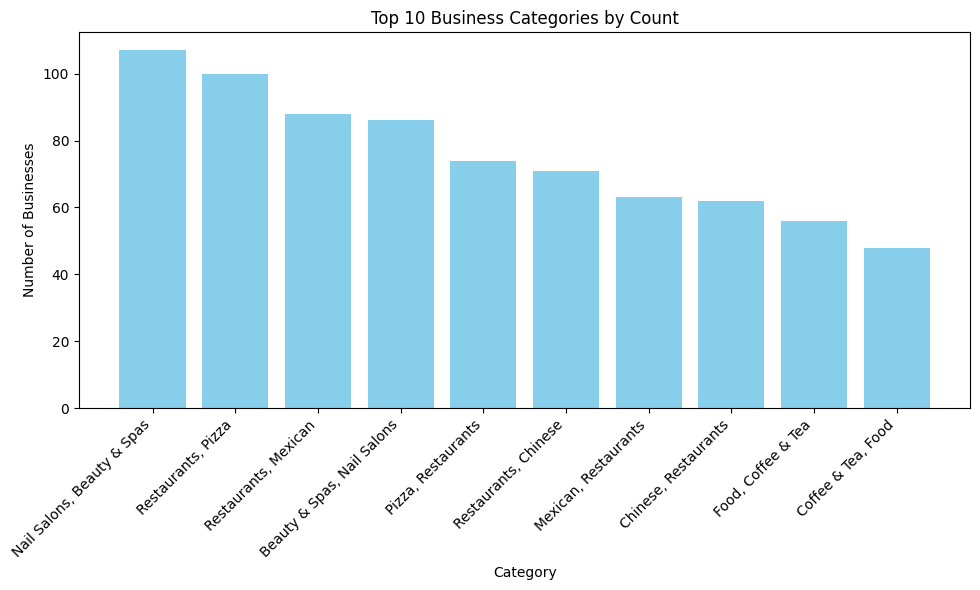

In [93]:

cursor = conn.cursor()

# Define the SQL query to retrieve the counts of businesses for each category
query = """
    SELECT categories, COUNT(*) AS business_count
    FROM business
    GROUP BY categories
    ORDER BY business_count DESC
    LIMIT 10
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()

# Extract category names and counts from the results
categories = [row[0] for row in results]
counts = [row[1] for row in results]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.title('Top 10 Business Categories by Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

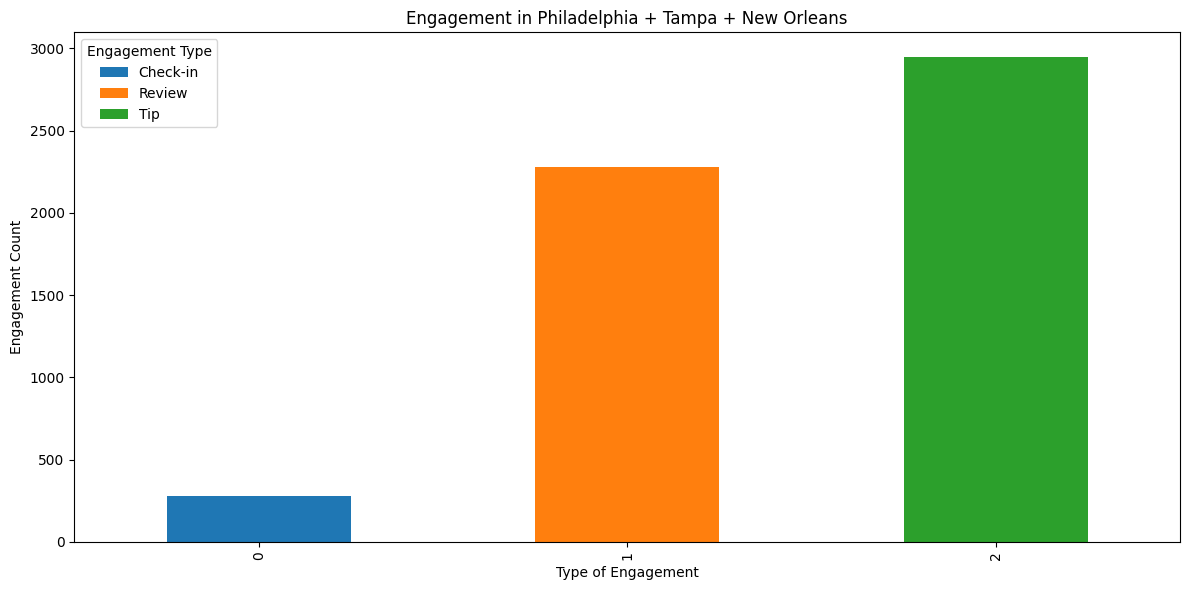

In [94]:
conn = sqlite3.connect('/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/YELP_DB.db')

cursor = conn.cursor()

query = """SELECT
  b.name,
  'Review' AS engagement_type,
  AVG(r.stars) AS avg_rating_given,
  COUNT(r.review_id) AS engagement_count
FROM business b
JOIN reviews r ON b.business_id = r.business_id
WHERE b.city IN ('Philadelphia', 'Tampa', 'New Orleans')
GROUP BY b.name

UNION ALL

SELECT
  b.name,
  'Tip' AS engagement_type,
  NULL AS avg_rating_given,  -- Tips don't have ratings
  COUNT(*) AS engagement_count  -- Counting the number of tips entries directly
FROM business b
JOIN tips t ON b.business_id = t.business_id
WHERE b.city IN ('Philadelphia', 'Tampa', 'New Orleans')
GROUP BY b.name

UNION ALL

SELECT
  b.name,
  'Check-in' AS engagement_type,
  NULL AS avg_rating_given,  -- Check-ins don't have ratings
  COUNT(*) AS engagement_count  -- Counting the number of check-in entries directly
FROM business b
JOIN checkin c ON b.business_id = c.business_id
WHERE b.city IN ('Philadelphia', 'Tampa', 'New Orleans')
GROUP BY b.name

ORDER BY name, engagement_type;"""

cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()

df = pd.read_sql(query, conn)  # Assuming you've fetched data from database

grouped_df = df.groupby(['engagement_type']).agg({'engagement_count': 'sum'}).reset_index()

# Pivot the DataFrame to have 'engagement_type' as columns
pivot_df = grouped_df.pivot( columns='engagement_type', values='engagement_count').fillna(0)

# Create the visualization
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Type of Engagement')
plt.ylabel('Engagement Count')
plt.title('Engagement in Philadelphia + Tampa + New Orleans')
plt.xticks(rotation=90)
plt.legend(title='Engagement Type')
plt.tight_layout()
plt.show()

#### Query Investigate if users who are more engaged on Yelp (via compliments and fans) tend to give higher or more varied ratings

In [66]:
query = """SELECT
    u.user_id,
    u.name,
    u.average_stars,
    u.review_count,
    AVG(r.stars) AS avg_review_rating,
    COUNT(r.review_id) AS total_reviews,
    SUM(r.useful) AS total_useful_votes,
    (u.compliment_cool + u.compliment_cute + u.compliment_funny +
     u.compliment_hot + u.compliment_list + u.compliment_more +
     u.compliment_note + u.compliment_photos + u.compliment_plain) AS total_compliments,
    u.fans
FROM users u
JOIN reviews r ON u.user_id = r.user_id
GROUP BY u.user_id
HAVING u.review_count > 10  -- Focus on more active users
ORDER BY total_compliments DESC, total_useful_votes DESC;"""
cursor = conn.cursor()

df = pd.read_sql(query, conn)

df

,user_id,name,average_stars,review_count,avg_review_rating,total_reviews,total_useful_votes,total_compliments,fans
0,-9da1xk7zgnnfO1uTVYGkA,Fran,4.14,1438,5.000000,1,19,37634,293
1,A0j21z2Q1HGic7jW6e9h7A,Georgie,3.76,1636,4.000000,1,34,24108,681
2,6s-g2vFu12OemhiK3FJuOQ,Dave,3.80,2388,4.071429,14,116,22626,1139
3,djxnI8Ux8ZYQJhiOQkrRhA,Abby,4.15,2506,3.750000,4,32,22529,1806
4,UVxY0iyPaqY7s4BSFtt-xA,Wanugee,3.53,1956,4.000000,1,7,19360,522
...,...,...,...,...,...,...,...,...,...
3875,zMH6OzKMdT-MYfb30eoEtw,Erin,2.85,12,5.000000,1,0,0,0
3876,zOG9gbfq2utEOpkAsNsJ3A,Dominique,3.96,23,5.000000,1,0,0,1
3877,zhHOtChur8FlBBkueiTlPg,Erin,4.58,36,5.000000,1,0,0,0
3878,zn2lM3TQf_fHIC43p0CwVg,Pope,4.09,43,5.000000,1,0,0,0


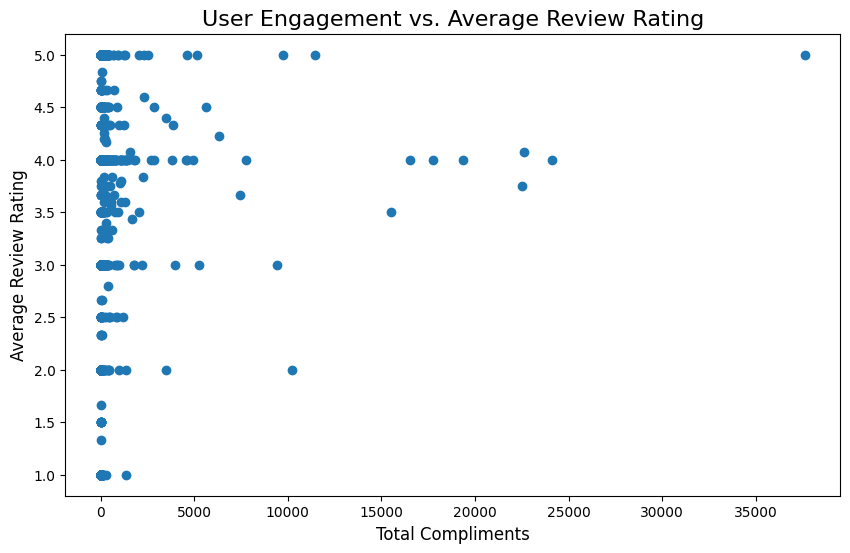

In [74]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['total_compliments'],
    df['avg_review_rating'])


# Adding titles and labels
plt.title('User Engagement vs. Average Review Rating', fontsize=16)
plt.xlabel('Total Compliments', fontsize=12)
plt.ylabel('Average Review Rating', fontsize=12)

# Show the plot
plt.show()

### Query for Cool vs Useful rating

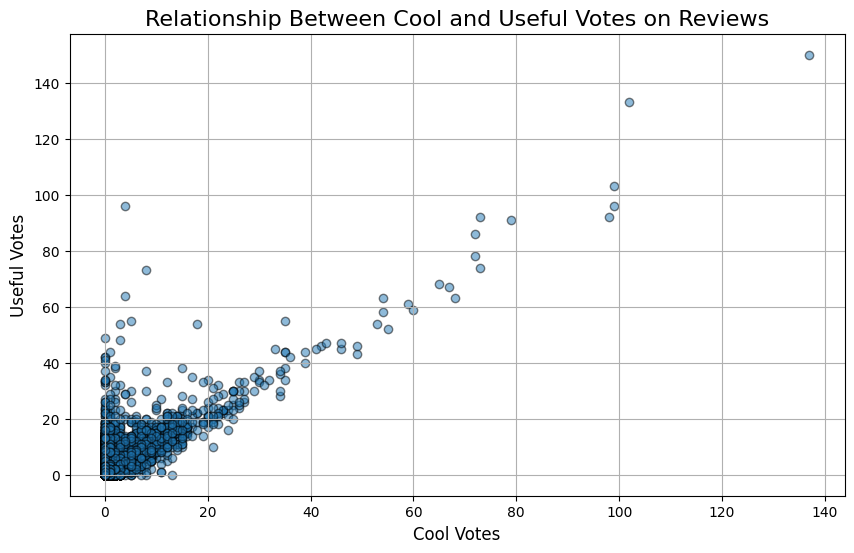

In [75]:
conn = sqlite3.connect('/content/drive/Shareddrives/Big_Data_project/Yelp_dataset/YELP_DB.db')

query = """
SELECT cool, useful
FROM reviews
"""

df = pd.read_sql(query, conn)
plt.figure(figsize=(10, 6))
plt.scatter(df['cool'], df['useful'], alpha=0.5, edgecolor='k')

# Adding titles and labels
plt.title('Relationship Between Cool and Useful Votes on Reviews', fontsize=16)
plt.xlabel('Cool Votes', fontsize=12)
plt.ylabel('Useful Votes', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

### Query for funny vs useful

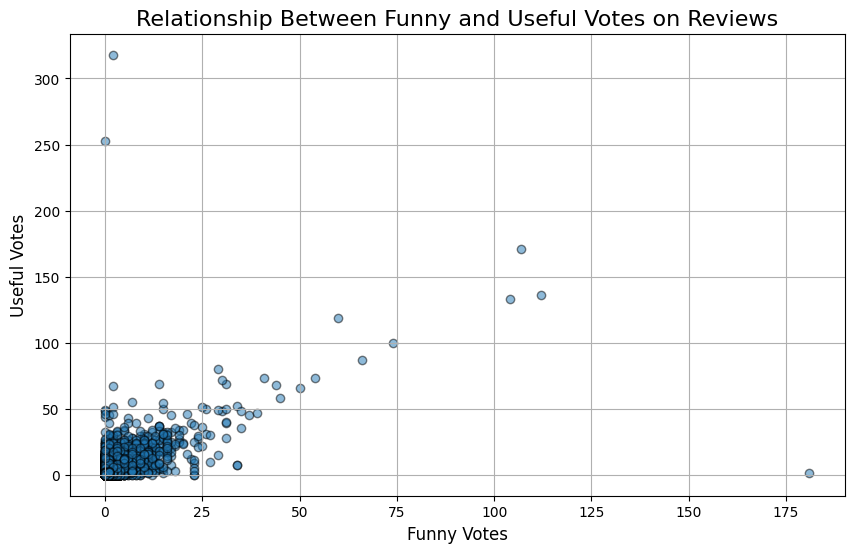

In [97]:

query = """
SELECT funny, useful
FROM reviews
"""

# Executing the query and loading data into a DataFrame
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
plt.scatter(df['funny'], df['useful'], alpha=0.5, edgecolor='k')

# Adding titles and labels
plt.title('Relationship Between Funny and Useful Votes on Reviews', fontsize=16)
plt.xlabel('Funny Votes', fontsize=12)
plt.ylabel('Useful Votes', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()



## Spark SQL querying

In [98]:
business_df.createOrReplaceTempView('business')
reviews_df.createOrReplaceTempView('reviews')
user_df.createOrReplaceTempView('users')
tips_df.createOrReplaceTempView('tips')
checkin_df.createOrReplaceTempView('hours')

### Number of Businesses

In [99]:
spark.sql('SELECT COUNT(1) as businesses from business').show()

+----------+
|businesses|
+----------+
|     15018|
+----------+



#### Top 10 States by Review Count(business)

<ipython-input-100-a3115d2f6a4a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='avg_reviews', data=result_pandas_df, palette='viridis')


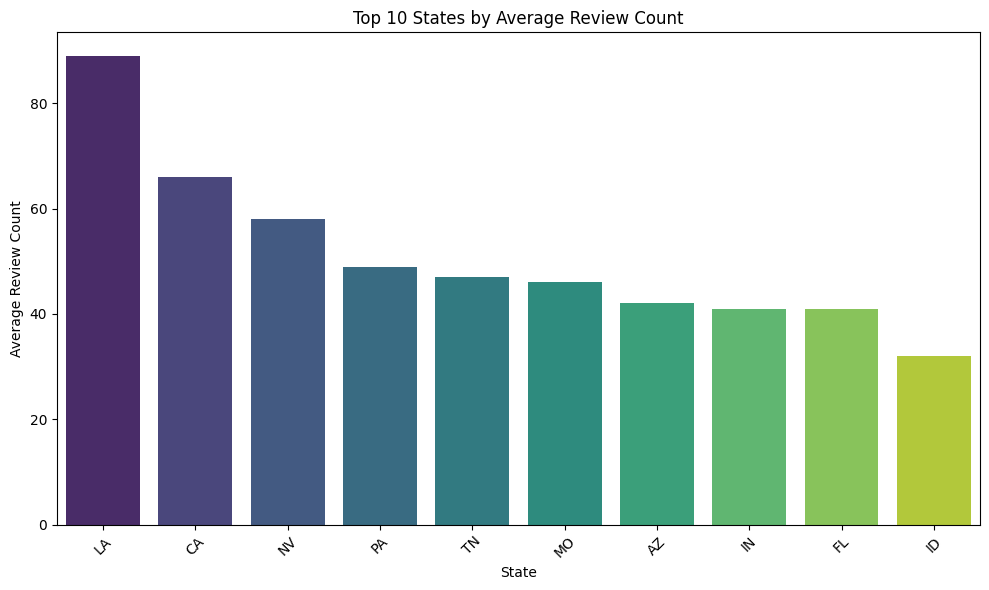

In [100]:
result_df = spark.sql('SELECT state, ROUND(AVG(review_count)) as avg_reviews from business GROUP BY state ORDER BY avg_reviews DESC LIMIT 10')
result_pandas_df = result_df.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='avg_reviews', data=result_pandas_df, palette='viridis')
plt.xlabel('State')
plt.ylabel('Average Review Count')
plt.title('Top 10 States by Average Review Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Number of businesses by state

<ipython-input-101-b04c43bab8b2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='business_count', data=result_pandas_df, palette='viridis')


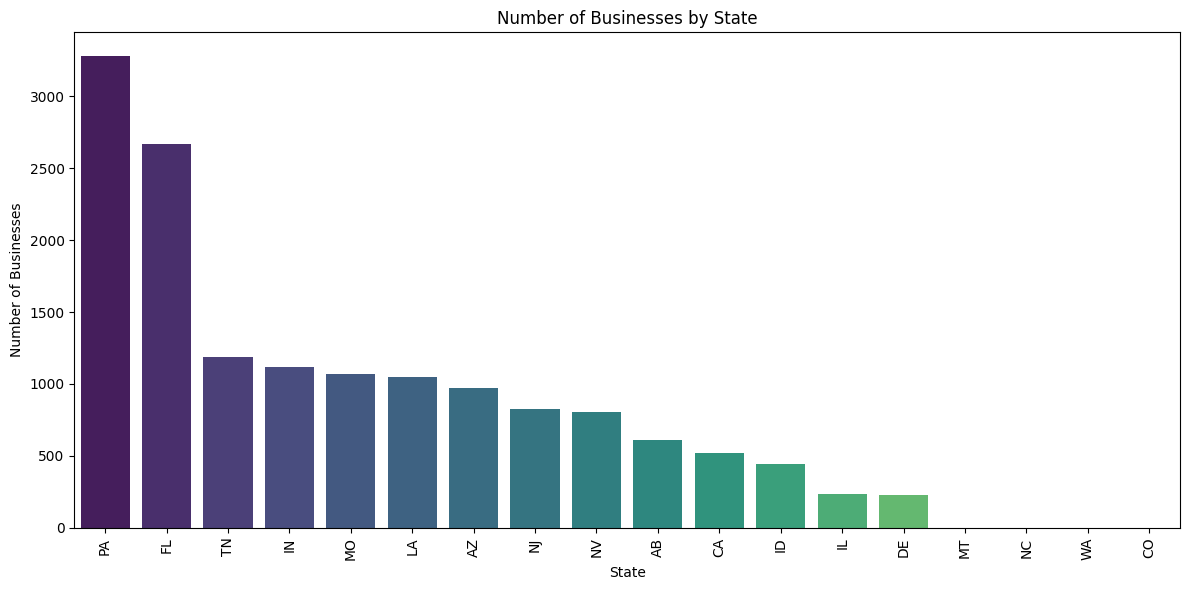

In [101]:
business_count_by_state = spark.sql("""
    SELECT state, COUNT(*) AS business_count
    FROM business
    GROUP BY state
    ORDER BY business_count DESC
""")

# Convert the Spark DataFrame to a Pandas DataFrame
result_pandas_df = business_count_by_state.toPandas()

# Create the visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='business_count', data=result_pandas_df, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Top 10 business with 5-star rating(business)

+--------------------+---------------+
|        BusinessName|FiveStarReviews|
+--------------------+---------------+
|        Oceana Grill|             36|
|              Cochon|             23|
|       Cafe La Maude|             18|
| Mother's Restaurant|             16|
|               Pêche|             15|
|The National WWII...|             15|
|       Prep & Pastry|             14|
|      Clear Sky Cafe|             14|
|       Loveless Cafe|             13|
+--------------------+---------------+



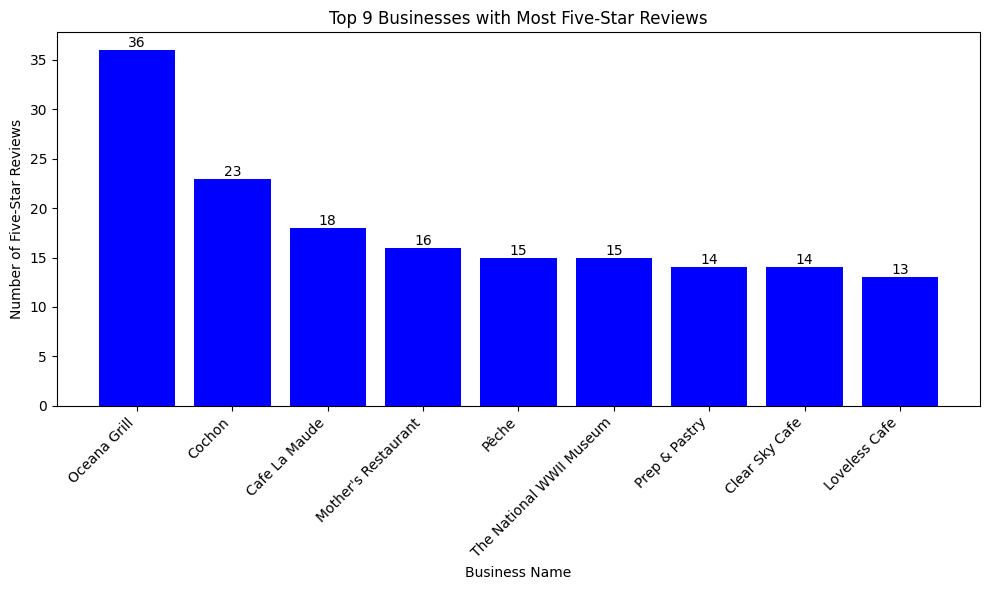

In [102]:


query_top_n_businesses = """
    SELECT b.name AS BusinessName, COUNT(*) AS FiveStarReviews
    FROM reviews r
    JOIN business b ON r.business_id = b.business_id
    WHERE r.stars = 5
    GROUP BY b.name
    ORDER BY FiveStarReviews DESC
    LIMIT 9
"""

top_n_businesses = spark.sql(query_top_n_businesses)
top_n_businesses.show()

top_n_businesses_df = top_n_businesses.toPandas()

plt.figure(figsize=(10, 6))
bars = plt.bar(top_n_businesses_df['BusinessName'], top_n_businesses_df['FiveStarReviews'], color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.xlabel('Business Name')
plt.ylabel('Number of Five-Star Reviews')
plt.title('Top 9 Businesses with Most Five-Star Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####  Rating vs Business

In [ ]:
result = spark.sql("""
    SELECT state, city, AVG(average_rating) AS avg_rating, COUNT(business_id) AS number_of_businesses
    FROM business
    GROUP BY state, city
    ORDER BY avg_rating DESC
""")

# Convert the Spark DataFrame to a Pandas DataFrame
result_pandas_df = result.toPandas()

# Create the visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_rating', y='number_of_businesses', data=result_pandas_df, hue='state', palette='Set2', s=100)
plt.xlabel('Average Rating')
plt.ylabel('Number of Businesses')
plt.title('Average Rating vs. Number of Businesses by City and State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Top 6 Categories(business)

In [ ]:
popular_categories = spark.sql("""
    SELECT categories, COUNT(*) AS category_count
    FROM business
    GROUP BY categories
    ORDER BY category_count DESC
    LIMIT 10
""")

popular_categories.show()


#### Business Average Star Rating


Average star rating per business:
+--------------------+--------------------+---------------+
|         business_id|                name|avg_star_rating|
+--------------------+--------------------+---------------+
|vy_rin8cRkzrUSmcV...|2 B Groomed Barbe...|            5.0|
|-LgWuUKKPhwp0wr6q...|Campbell House Mu...|            5.0|
|4phSC3w3422K6SUJg...|Coffee Junkiez Pi...|            5.0|
|Uq9Xn8JViEE3Sh0As...| Dunedin Dental Care|            5.0|
|HRh-JeWCnn2sjG_He...|Revive Medical Bo...|            5.0|
|FWDT9NySmoT-O5-D8...|      Easy Dentistry|            5.0|
|KYFJ7qh7bYYAsjnGr...|     Bing's Boba Tea|            5.0|
|xnmIZz0EJ1Pv42Juf...|Maaco Auto Body S...|            5.0|
|gV89NXiZ3C0RNz1ST...|  Fort Edmonton Park|            5.0|
|2Yceyld-Ps6PnFet_...|    Fortress Roofing|            5.0|
|SPhcwEy32VV8dsaRS...|Marshall Brothers...|            5.0|
|3zNqJjfN_lX6ajzfK...|          Park Place|            5.0|
|1Uj_Ob1C2z5Ykx-WH...| Bubbakoo's Burritos|            5.0|
|o7S4S

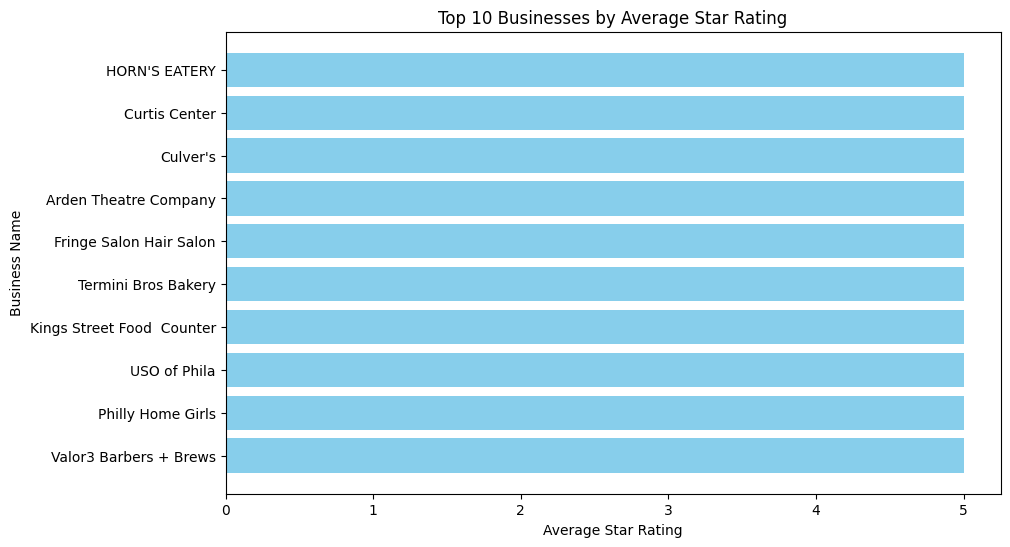

In [107]:
query_avg_star_rating_per_business = """
    SELECT b.business_id, b.name, AVG(r.stars) AS avg_star_rating
    FROM business b
    LEFT OUTER JOIN reviews r
    ON b.business_id = r.business_id
    GROUP BY b.business_id, b.name
    ORDER BY avg_star_rating DESC
"""

# Execute the SQL query
avg_star_rating_per_business = spark.sql(query_avg_star_rating_per_business)

# Show the results
print("Average star rating per business:")
avg_star_rating_per_business.show()

# Plotting the results
business_names = avg_star_rating_per_business.select("name").rdd.flatMap(lambda x: x).collect()
avg_ratings = avg_star_rating_per_business.select("avg_star_rating").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
plt.barh(business_names[:10], avg_ratings[:10], color='skyblue')
plt.xlabel('Average Star Rating')
plt.ylabel('Business Name')
plt.title('Top 10 Businesses by Average Star Rating')
plt.gca().invert_yaxis()
plt.show()

#### Useful, funny, cool reviews(reviews)

In [ ]:
#useful reviews
query_useful_reviews = """
    SELECT SUM(useful) AS UsefulCount
    FROM reviews
"""

#funny reviews
query_funny_reviews = """
    SELECT SUM(funny) AS FunnyCount
    FROM reviews
"""

#cool reviews
query_cool_reviews = """
    SELECT SUM(cool) AS CoolCount
    FROM reviews
"""
useful_count = spark.sql(query_useful_reviews).collect()[0]['UsefulCount']
funny_count = spark.sql(query_funny_reviews).collect()[0]['FunnyCount']
cool_count = spark.sql(query_cool_reviews).collect()[0]['CoolCount']

reviews_summary = spark.createDataFrame([
    ('Useful', useful_count),
    ('Funny', funny_count),
    ('Cool', cool_count)
], ['ReviewType', 'Count'])

reviews_summary_pd = reviews_summary.toPandas()
reviews_summary_pd.plot(kind='bar', x='ReviewType', y='Count', color=['skyblue', 'lightgreen', 'lightcoral'], legend=False)
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Distribution of Useful, Funny, and Cool Reviews')
plt.show()


#### Top 10 *negative* reviews(reviews)





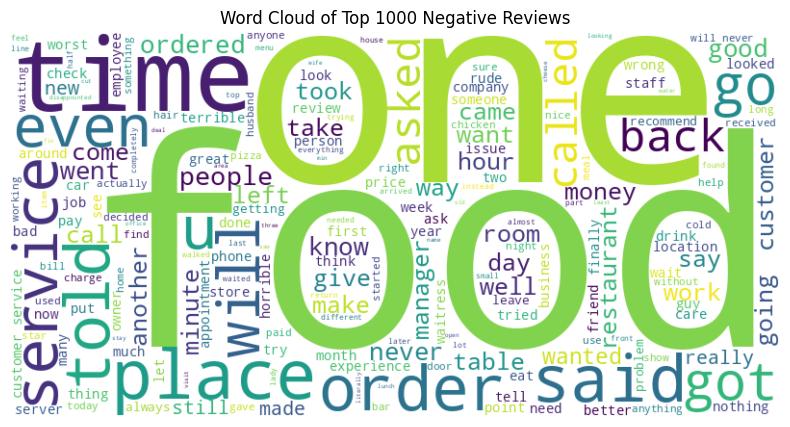

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

query_top_negative_reviews = """
    SELECT text
    FROM reviews
    ORDER BY stars ASC
    LIMIT 1000
"""

top_negative_reviews_text = spark.sql(query_top_negative_reviews).toPandas()['text'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_negative_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Top 1000 Negative Reviews')
plt.axis('off')
plt.show()

#### Top 10 positive reviews(reviews)

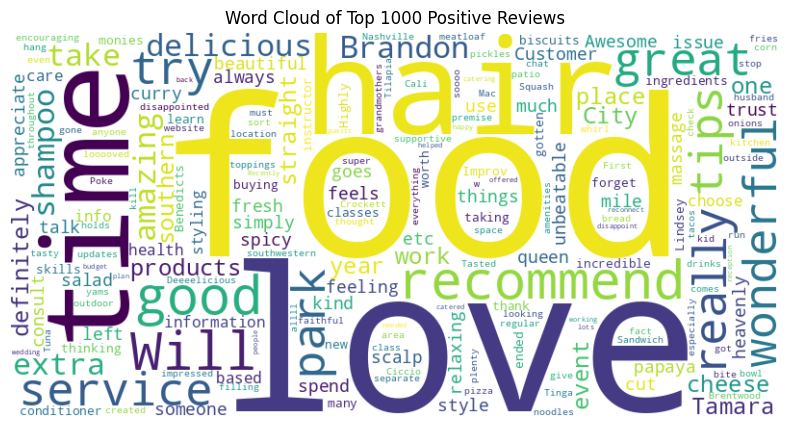

In [104]:
query_top_positive_reviews = """
    SELECT review_id, stars, text
    FROM reviews
    ORDER BY stars DESC
    LIMIT 10
"""

top_positive_reviews_text = spark.sql(query_top_positive_reviews).toPandas()['text'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_positive_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Top 1000 Positive Reviews')
plt.axis('off')
plt.show()

#### Categories Wordcloud

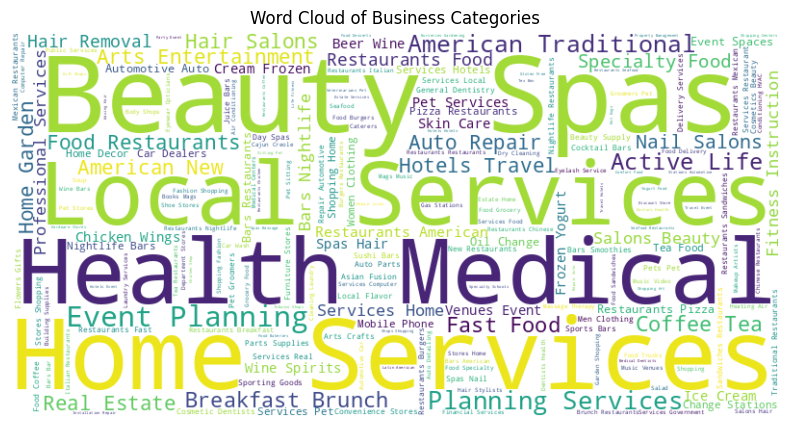

In [105]:
import pyspark.sql.functions as F


categories_query = """
    SELECT categories
    FROM business
    WHERE categories IS NOT NULL
"""

categories_result = spark.sql(categories_query)
categories_list = [row.categories for row in categories_result.collect() if row.categories is not None]
categories_text = ' '.join(categories_list)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(categories_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Business Categories')
plt.axis('off')
plt.show()

#### Star Rating distribution

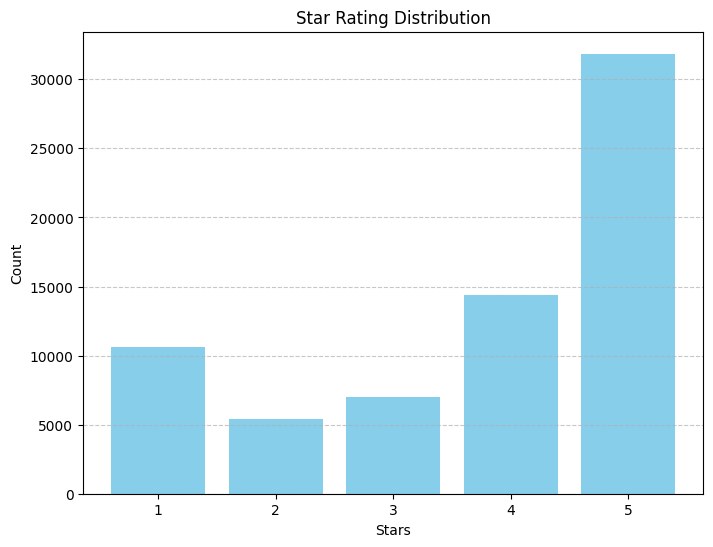

In [108]:

# Execute SQL query to fetch data
result = spark.sql("""
    SELECT stars, COUNT(*) AS count
    FROM reviews
    GROUP BY stars
    ORDER BY stars ASC
""")

# Convert SQL result to Pandas DataFrame
df = result.toPandas()

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(df['stars'], df['count'], color='skyblue')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Star Rating Distribution')
plt.xticks(df['stars'])  # Set x-ticks to display all star ratings
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### - Review counts per business
- Businessess without reviews
- Average star rating per user
- Total checkins per business

In [109]:


# SQL query using JOIN to get the count of reviews for each business
query_reviews_count = """
    SELECT b.business_id, b.name, COUNT(r.review_id) AS review_count
    FROM business b
    JOIN reviews r
    ON b.business_id = r.business_id
    GROUP BY b.business_id, b.name
    ORDER BY review_count DESC
"""

# SQL query using OUTER JOIN to get the businesses without any reviews
query_business_without_reviews = """
    SELECT b.business_id, b.name
    FROM business b
    LEFT OUTER JOIN reviews r
    ON b.business_id = r.business_id
    WHERE r.review_id IS NULL
"""

# SQL query using INNER JOIN to get the average star rating for each user
query_avg_star_rating_per_user = """
    SELECT u.user_id, u.name, AVG(r.stars) AS avg_star_rating
    FROM users u
    INNER JOIN reviews r
    ON u.user_id = r.user_id
    GROUP BY u.user_id, u.name
    ORDER BY avg_star_rating DESC
"""

# SQL query using GROUP BY to get the total number of check-ins for each business
query_total_checkins_per_business = """
    SELECT h.business_id, COUNT(*) AS total_checkins
    FROM hours h
    GROUP BY h.business_id
    ORDER BY total_checkins DESC
"""

reviews_count = spark.sql(query_reviews_count)
business_without_reviews = spark.sql(query_business_without_reviews)
avg_star_rating_per_user = spark.sql(query_avg_star_rating_per_user)
total_checkins_per_business = spark.sql(query_total_checkins_per_business)

print("Reviews count per business:")
reviews_count.show()

print("Businesses without reviews:")
business_without_reviews.show()

print("Average star rating per user:")
avg_star_rating_per_user.show()

print("Total check-ins per business:")
total_checkins_per_business.show()

Reviews count per business:
+--------------------+--------------------+------------+
|         business_id|                name|review_count|
+--------------------+--------------------+------------+
|ac1AeYqs8Z4_e2X5M...|        Oceana Grill|          75|
|iSRTaT9WngzB8JJ2Y...| Mother's Restaurant|          58|
|6a4gLLFSgr-Q6CZXD...|              Cochon|          51|
|j-qtdD55OLfSqfsWu...|                Parc|          23|
|UCMSWPqzXjd7QHq7v...|       Prep & Pastry|          22|
|Vz2RN55rTJBGn43K1...|            Domenica|          22|
|K7KHmHzxNwzqiijSJ...|       Cafe La Maude|          22|
|V9VLhHdSFpFi4yXFq...|               Pêche|          21|
|OWOOc0YjU_kioLeEg...|       Loveless Cafe|          21|
|Ps7Q7BOKzJO4nDTUh...|      Clear Sky Cafe|          20|
|3WU1ZobAqXQ07xYoK...|Daisy Dukes - Fre...|          19|
|kZ1q0K13tFYG_ZJrV...|              Sampan|          19|
|Dzm1y59cLFt8OjTsZ...|Circles Waterfron...|          19|
|Ipkx4Sa7ybn8C6LtT...|         Double Knot|          19|
|7I

#### Names of Restaurants

In [110]:
query_restaurants = """
    SELECT name, city, state, categories
    FROM business
    WHERE lower(categories) LIKE '%restaurant%'
"""

# Execute the query using Spark SQL
restaurants = spark.sql(query_restaurants)

# Show the result
restaurants.show(truncate=False)

+-----------------------------------+----------------+-----+---------------------------------------------------------------------------+
|name                               |city            |state|categories                                                                 |
+-----------------------------------+----------------+-----+---------------------------------------------------------------------------+
|St Honore Pastries                 |Philadelphia    |PA   |Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries                      |
|Paws The Cat Cafe                  |Edmonton        |AB   |Coffee & Tea, Cafes, Pets, Restaurants, Pet Adoption, Food                 |
|Impasto                            |Tampa           |FL   |Restaurants, Italian, Food Trucks, Food                                    |
|Ricardo's Italian Cafe             |Saint Louis     |MO   |American (New), Restaurants, Cafes, Italian, American (Traditional)        |
|Crafty Crab                        |Fair

##### Senitment Analysis

In [135]:
query_negative_reviews = """
    SELECT r.*
    FROM reviews r
    JOIN business b ON r.business_id = b.business_id
    WHERE b.name = "McDonald's"
    AND r.stars <= 3
"""

negative_reviews_df = spark.sql(query_negative_reviews)
negative_reviews_df.show(truncate=False)


+----------------------+----+-------------------+-----+----------------------+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [136]:
query_positive_reviews = """
    SELECT r.*
    FROM reviews r
    JOIN business b ON r.business_id = b.business_id
    WHERE b.name = "McDonald's"
    AND r.stars > 3
"""

positive_reviews_df = spark.sql(query_positive_reviews)
positive_reviews_df.show(truncate=False)


+----------------------+----+-------------------+-----+----------------------+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+----------------------+
|business_id           |cool|date               |funny|review_id             |stars|text                                                                                        

In [ ]:
!pip install afinn

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from afinn import Afinn

# Load the AFINN sentiment lexicon
afinn = Afinn()

# Define a UDF to calculate sentiment scores for reviews
def calculate_sentiment(review):
    # Split the review text into words
    words = review.split()
    # Calculate the sentiment score for each word and sum them up
    sentiment_score = sum(afinn.score(word) for word in words)
    return float(sentiment_score)

# Register the UDF (User Defined Function) for sentiment calculation
calculate_sentiment_udf = udf(calculate_sentiment, FloatType())

# Apply the sentiment analysis UDF to the positive reviews
positive_reviews_with_sentiment = positive_reviews_df.withColumn("sentiment_score", calculate_sentiment_udf("text"))

# Apply the sentiment analysis UDF to the negative reviews
negative_reviews_with_sentiment = negative_reviews_df.withColumn("sentiment_score", calculate_sentiment_udf("text"))

# Show the positive reviews with sentiment scores
positive_reviews_with_sentiment.show(truncate=False)

# Show the negative reviews with sentiment scores
negative_reviews_with_sentiment.show(truncate=False)


In [ ]:
from pyspark.sql.functions import udf, lit
from pyspark.sql.types import FloatType
import matplotlib.pyplot as plt

def calculate_sentiment(review):
    words = review.split()
    sentiment_score = sum(afinn.score(word) for word in words)
    return float(sentiment_score)

calculate_sentiment_udf = udf(calculate_sentiment, FloatType())

positive_reviews_with_sentiment = positive_reviews_df.withColumn("sentiment_score", calculate_sentiment_udf("text"))

negative_reviews_with_sentiment = negative_reviews_df.withColumn("sentiment_score", calculate_sentiment_udf("text"))

print("Positive Reviews:")
positive_reviews_with_sentiment.select("sentiment_score", "text").show(10, truncate=False)

print("Negative Reviews:")
negative_reviews_with_sentiment.select("sentiment_score", "text").show(10, truncate=False)

mean_positive_sentiment = positive_reviews_with_sentiment.agg({"sentiment_score": "mean"}).collect()[0][0]
mean_negative_sentiment = negative_reviews_with_sentiment.agg({"sentiment_score": "mean"}).collect()[0][0]

print("\nSummary Analysis:")
print(f"Mean Sentiment Score (Positive Reviews): {mean_positive_sentiment}")
print(f"Mean Sentiment Score (Negative Reviews): {mean_negative_sentiment}")

positive_sentiment_scores = positive_reviews_with_sentiment.select("sentiment_score").limit(10).collect()
negative_sentiment_scores = negative_reviews_with_sentiment.select("sentiment_score").limit(10).collect()


